## Data preprosesing

### Виявляємо пропущені дані
Конвертуємо <b>"?"</b> в NaN

In [163]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from tabulate import tabulate
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
sns.set(style="whitegrid")

In [164]:
df = pd.read_csv('dataset/VehicleDataset.csv')
df.columns = [column.lower().replace("-", "_").replace(" ", "_") for column in df.columns]
df.replace('?', np.nan, inplace = True)

### Перевіряємо кількість пропусків у кожному стовпці
Кожен стовпець містить 205 рядків даних і 7 стовпців, у яких відсутні дані:

1) <b> нормалізувати втрати </b>: 41 відсутня дана
2) <b>Кількість дверей</b>: 2 відсутні дані
3) <b>отвір</b>: 4 відсутні дані
4) <b>обведення</b>: 4 відсутні дані
5) <b>кінська сила</b>: 2 відсутні дані
6) <b>пікова кількість обертів на хвилину</b>: 2 відсутні дані
7) <b>ціна</b>: 4 відсутні дані

### Перевіряємо на тип даних кожен стовпець
Також в даних колонках неправильно виявлені типи даних,<br> у наступних 6 колонках неправильно представлені типи даних

1) нормовані втрати - об'єкт
2) отвір - об'єкт
3) обведення - об'єкт
4) кінська сила - об'єкт
5) пікова кількість обертів на хвилину - об'єкт
6) ціна - об'єкт

#### Повна характеристика

| index | name              | type    | not null | null |
|-------|-------------------|---------|----------|------|
| 0     | symboling         | int64   | 205      | 0    |
| 1  | normalized_losses | object  | 164      | 41   |
| 2  | make              | object  | 205      | 0    |
| 3  | fuel_type         | object  | 205      | 0    |
| 4  | aspiration        | object  | 205      | 0    |
| 5  | num_of_doors      | object  | 203      | 2    |
| 6  | body_style        | object  | 205      | 0    |
| 7  | drive_wheels      | object  | 205      | 0    |
| 8  | engine_location   | object  | 205      | 0    |
| 9  | wheel_base        | float64 | 205      | 0    |
| 10 | length            | float64 | 205      | 0    |
| 11 | width             | float64 | 205      | 0    |
| 12 | height            | float64 | 205      | 0    |
| 13 | curb_weight       | int64   | 205      | 0    |
| 14 | engine_type       | object  | 205      | 0    |
| 15 | num_of_cylinders  | object  | 205      | 0    |
| 16 | engine_size       | int64   | 205      | 0    |
| 17 | fuel_system       | object  | 205      | 0    |
| 18 | bore              | object  | 201      | 4    |
| 19 | stroke            | object  | 201      | 4    |
| 20 | compression_ratio | float64 | 205 | 0 |
| 21 | horsepower        | object  | 203 | 2 |
| 22 | peak_rpm          | object  | 203 | 2 |
| 23 | city_mpg          | int64   | 205 | 0 |
| 24 | highway_mpg       | int64   | 205 | 0 |
| 25 | price             | object  | 201 | 4 |

In [165]:
def describe_(df):
    missing_data = df.isnull()

    data_isnotnull = [df[column][df[column] != np.nan].count() for column in df.columns]
    data_null = [max(data_isnotnull)-value for value in data_isnotnull]
    
    data = np.array([missing_data.columns, df.dtypes.values, data_isnotnull, data_null], dtype=str).T
    headers= ["Name","Type","No Null", "Null"]

    display(pd.DataFrame(data, columns=headers))

In [166]:
describe_(df)

,Name,Type,No Null,Null
0,symboling,int64,205,0
1,normalized_losses,object,164,41
2,make,object,205,0
3,fuel_type,object,205,0
4,aspiration,object,205,0
5,num_of_doors,object,203,2
6,body_style,object,205,0
7,drive_wheels,object,205,0
8,engine_location,object,205,0
9,wheel_base,float64,205,0


### Заміняємо відсутні значення або видаляємо їх
<b>Замінити на середнє значення:</b>
<ul>
    <li><b>нормалізовані втрати</b>: 41 відсутні дані, замініть їх середніми значеннями</li>
    <li><b>штрих</b>: 4 відсутні дані, замініть їх середніми</li>
    <li><b>отвір</b>: 4 відсутні дані, замініть їх середніми</li>
    <li><b>кінська сила</b>: 2 відсутні дані, замініть їх середніми значеннями</li>
    <li><b>peak-rpm</b>: 2 відсутні дані, замініть їх середніми</li>
</ul>

<b>Відкинути всі 6 рядки:</b>
<ul>
    <li><b>ціна</b>: 4 відсутні дані, видалити </li>
    <li><b>кількість дверей</b>: 2 відсутні дані, видалити</li>
</ul>

#### Delete 6-rows price and 2 num of doors

In [167]:
df.dropna(subset=["price", "num_of_doors"],axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

#### Replace and Convert

In [168]:
def Calculate_Mean(df, сolumns):
    for index, column in enumerate(сolumns):
        avg_value = df[column].astype("float").mean(axis=0)
        df[column].replace(np.nan, avg_value, inplace=True)
    return df


def Convert_Type(df, columns, type_):
    for index, column in enumerate(columns):
        df[column] = df[column].astype(type_[index])
    return df


def Count_labels(df, titles):
    for title in titles:
        df[title] = LabelEncoder().fit_transform(df[title].values)
    return df

In [169]:
df.num_of_doors.replace(np.nan,"four",inplace=True)
df = Calculate_Mean(df, ["normalized_losses", "bore", "stroke", "horsepower", "peak_rpm"])
df = Convert_Type(df, ["normalized_losses", "bore", "stroke", "horsepower", "peak_rpm", "price"], [int, float, float, int, int, float])
df_tr = df.copy()
df_tr = Count_labels(df_tr, df_tr.select_dtypes(include='object').columns)

#### Квантиль
Використовуємо квантиль для відсікання дуже екстремальних значень, кількість залеших даних 179 з 205 (26)

In [170]:
df = df_tr[df_tr.price < df_tr.price.quantile(0.9)]

In [171]:
describe_(df)

,Name,Type,No Null,Null
0,symboling,int64,179,0
1,normalized_losses,int32,179,0
2,make,int32,179,0
3,fuel_type,int32,179,0
4,aspiration,int32,179,0
5,num_of_doors,int32,179,0
6,body_style,int32,179,0
7,drive_wheels,int32,179,0
8,engine_location,int32,179,0
9,wheel_base,float64,179,0


### Описовий статистичний аналіз
Після відсіяення колонок залишилось 19 колонок з 24
* Символіка - 0,057
* Нормовані втрати - 0,299
* Виробник - 0,02
* Тип кузова - 0.092
* Ведучі колеса - 0,571
* Колісна база - 0,623
* Довжина - 0,72
* Ширина - 0,752
* Висота - 0,191
* Споряджена маса - 0,84
* Тип двигуна - 0,053
* Кількість циліндрів - 0.169
* Об'єм двигуна - 0.724
* Паливна система - 0,662
* Ступінь стиснення - 0,073
* Кінська сила - 0,762
* Пікові оберти - 0,054
* Місто mpg - 0,706
* Шосе mpg - 0,701

In [172]:
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold

In [173]:
def udf_pearsonr(X, y): 
    result = np.array([pearsonr(x, y) for x in X.T])
    return np.absolute(result[:,0]), result[:,1] 

def transform(data, titles:[], target='price'):
    set_x = data.loc[:,titles]
    y = set_x[target]
    set_x = set_x.drop(target, axis=1)
    return np.array(set_x.values.tolist()),y.values.tolist()

selector = SelectKBest(udf_pearsonr, k=2)
selector_varianceThreshold = VarianceThreshold(0.25)

In [174]:
selected_data = selector_varianceThreshold.fit_transform(df)
title_features = selector_varianceThreshold.get_feature_names_out(df.columns)

X, y = transform(df, title_features)

train_set = X
train_y = y
display(len(title_features))

20

In [175]:
for idx in range(train_set.shape[1]):
    title = title_features[idx].replace("_", " ").capitalize()
    pea_score, p_value = pearsonr(train_set[:,idx], train_y)
    print(f"* {title} feature - {round(np.abs(pea_score),3)}")

* Symboling feature - 0.057
* Normalized losses feature - 0.299
* Make feature - 0.02
* Body style feature - 0.092
* Drive wheels feature - 0.571
* Wheel base feature - 0.623
* Length feature - 0.72
* Width feature - 0.752
* Height feature - 0.191
* Curb weight feature - 0.84
* Engine type feature - 0.053
* Num of cylinders feature - 0.169
* Engine size feature - 0.724
* Fuel system feature - 0.662
* Compression ratio feature - 0.073
* Horsepower feature - 0.762
* Peak rpm feature - 0.054
* City mpg feature - 0.706
* Highway mpg feature - 0.701


### Visual

[Text(0, 0.5, ''), Text(0.5, 1.0, 'Importences features')]

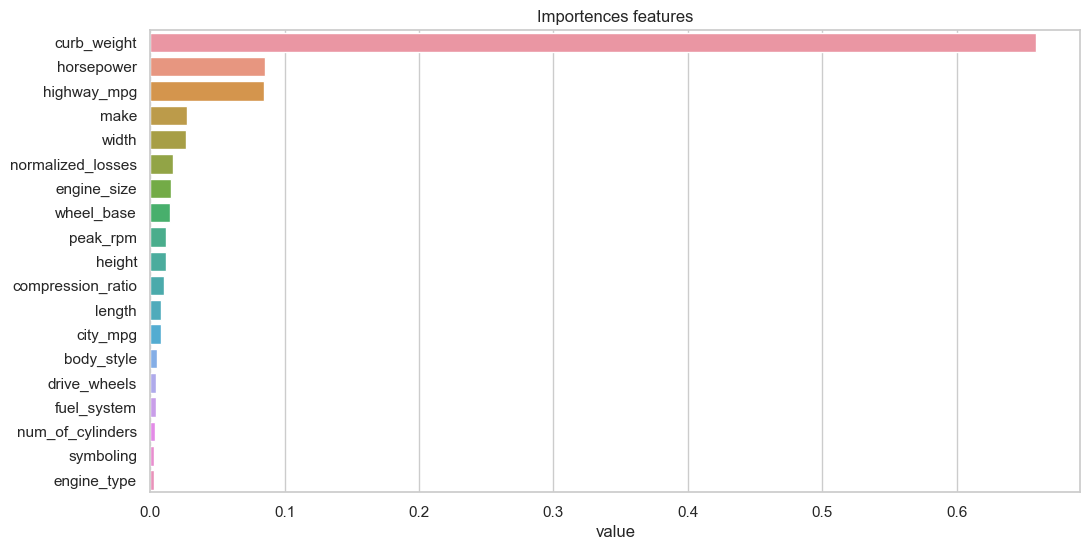

In [176]:
clf = RandomForestRegressor(n_estimators = 50, random_state = 123)
clf.fit(X, y)
fig, ax=plt.subplots(figsize=(12,6))
importances = clf.feature_importances_
indices =np.argsort(importances)
title="Importences features"
importences_features = pd.DataFrame(data={"value":importances, "title":np.array(title_features)[range(len(indices))]})
sns.barplot(data=importences_features.sort_values("value",ascending=False ), x="value", y="title")
ax.set(ylabel=None, title=title)

Text(0.5, 0.98, 'Лінійна регресивна модель')

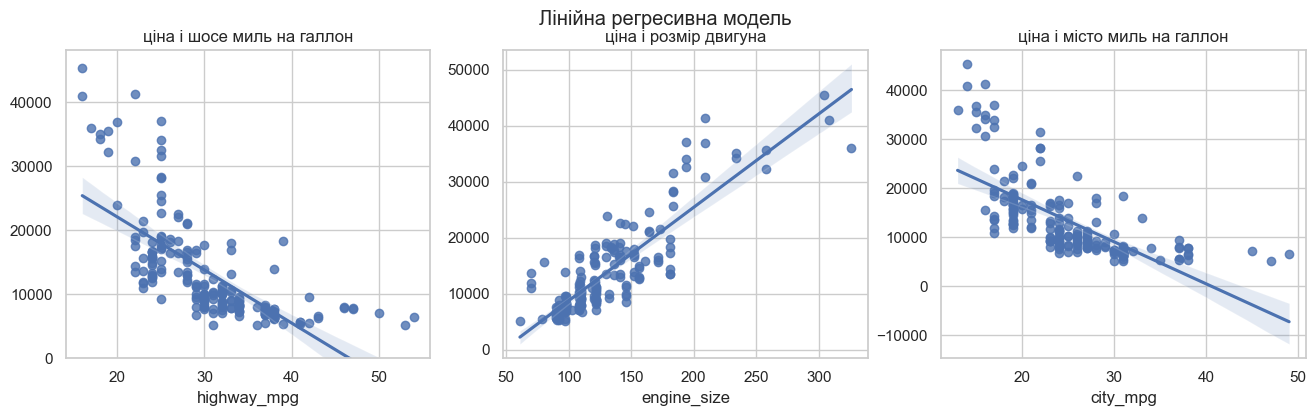

In [177]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1,3, figsize=(16,4))
sns.regplot(x="highway_mpg", y="price", data=df_tr, ax=axes[0]).set(ylim=(0))
sns.regplot(x="engine_size", y="price", data=df_tr, ax=axes[1])
sns.regplot(x="city_mpg", y="price", data=df_tr, ax=axes[2])

axes[0].set(title="ціна і шосе миль на галлон" , ylabel=None)
axes[1].set(title="ціна і розмір двигуна" , ylabel=None)
axes[2].set(title="ціна і місто миль на галлон", ylabel=None)

title="Лінійна регресивна модель"
fig.suptitle(title.replace("_", " "))

<AxesSubplot:>

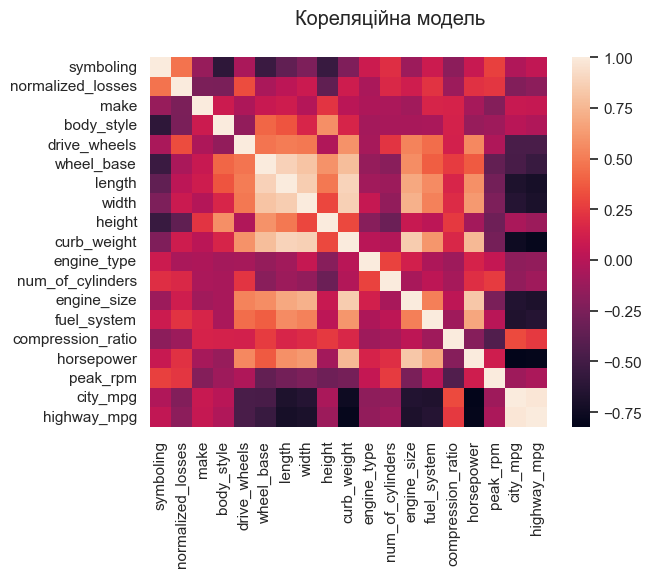

In [178]:
fig, ax = plt.subplots()
cln_date = df_tr[title_features]
correlation = cln_date.drop(["price"], axis=1).corr(min_periods=3)
correlation.set_index(correlation.columns, inplace=True)
correlation.to_csv('result_correlation.csv', encoding='utf-8', index=True)
title="Кореляційна модель"
fig.suptitle(title.replace("_", " "))
sns.heatmap(correlation, ax=ax)